# EDA

In [97]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [98]:
pd.set_option('display.max_columns', None)

## Cargar Datos Enriquecidos 

### Animes

In [99]:
animes = pd.read_csv('/home/m0i53s/Documentos/Mineria_de_Datos/Proyecto/Minitas_chinas/DataSets/Datos_Enriquecidos/anime_enriquesido.csv')

In [100]:
animes.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,Premiered,Status,Producers,Licensors,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43.0,78525.0,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602.0,1448.0,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246.0,15035.0,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,"Bandai Visual, Dentsu, Victor Entertainment, T...","Funimation, Bandai Entertainment",Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795.0,613.0,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,"TV Tokyo, Dentsu",Illumitoon Entertainment,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126.0,14.0,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### Usuarios

In [101]:
usuarios = pd.read_csv('/home/m0i53s/Documentos/Mineria_de_Datos/Proyecto/Minitas_chinas/DataSets/Datos_Enriquecidos/user_det.csv')

In [102]:
usuarios.head()

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


### Rating

In [103]:
rating = pd.read_csv('/home/m0i53s/Documentos/Mineria_de_Datos/Proyecto/Minitas_chinas/DataSets/Datos_Enriquecidos/rating_enriquecido.csv')

In [104]:
rating.head()

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


## Análisis Univariado Discreto

### Animes

In [105]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25005 entries, 0 to 25004
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anime_id      25005 non-null  int64  
 1   Name          25005 non-null  object 
 2   English name  24905 non-null  object 
 3   Other name    24905 non-null  object 
 4   Score         24905 non-null  object 
 5   Genres        25004 non-null  object 
 6   Synopsis      24905 non-null  object 
 7   Type          25000 non-null  object 
 8   Episodes      25005 non-null  object 
 9   Aired         24905 non-null  object 
 10  Premiered     24905 non-null  object 
 11  Status        24905 non-null  object 
 12  Producers     24905 non-null  object 
 13  Licensors     24905 non-null  object 
 14  Studios       24905 non-null  object 
 15  Source        24905 non-null  object 
 16  Duration      24905 non-null  object 
 17  Rating        24905 non-null  object 
 18  Rank          24991 non-nu

In [106]:
animes.isnull().sum()

anime_id          0
Name              0
English name    100
Other name      100
Score           100
Genres            1
Synopsis        100
Type              5
Episodes          0
Aired           100
Premiered       100
Status          100
Producers       100
Licensors       100
Studios         100
Source          100
Duration        100
Rating          100
Rank             14
Popularity      100
Favorites       100
Scored By       100
Members           0
Image URL       100
dtype: int64

In [107]:
animes.describe()

,anime_id,Popularity,Favorites,Members
count,25005.000000,24905.000000,24905.000000,2.500500e+04
mean,29741.969246,12265.388356,432.595222,3.696420e+04
std,17963.009646,7187.428393,4353.181647,1.565272e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10504.000000,6040.000000,0.000000,2.080000e+02
50%,34525.000000,12265.000000,1.000000,1.051000e+03
75%,45209.000000,18491.000000,18.000000,9.251000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


#### Score

In [108]:
# Primero, eliminamos los valores nulos
animes_cleaned = animes.dropna(subset=['Score'])

In [109]:
# Utilizamos expresiones regulares para extraer los valores numéricos
animes_cleaned['Score'] = animes_cleaned['Score'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x)))

/tmp/ipykernel_11515/485377204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_cleaned['Score'] = animes_cleaned['Score'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x)))


In [110]:
# Convertimos los valores extraídos en tipo float y nos quedamos con el primer valor si hay múltiples valores
animes_cleaned['Score'] = animes_cleaned['Score'].apply(lambda x: float(x[0]) if x else None)

/tmp/ipykernel_11515/1238019741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_cleaned['Score'] = animes_cleaned['Score'].apply(lambda x: float(x[0]) if x else None)


In [111]:
# Definir los intervalos y las etiquetas
bins = [0, 5, 6, 7, 8, 9, 10]  # Define los intervalos
labels = ['0-5', '5-6', '6-7', '7-8', '8-9', '9-10']  # Etiquetas para los intervalos


In [112]:
# Discretizar los puntajes en intervalos y asignar las etiquetas
animes_cleaned['Score_category'] = pd.cut(animes_cleaned['Score'], bins=bins, labels=labels, right=False)


/tmp/ipykernel_11515/2103872551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animes_cleaned['Score_category'] = pd.cut(animes_cleaned['Score'], bins=bins, labels=labels, right=False)


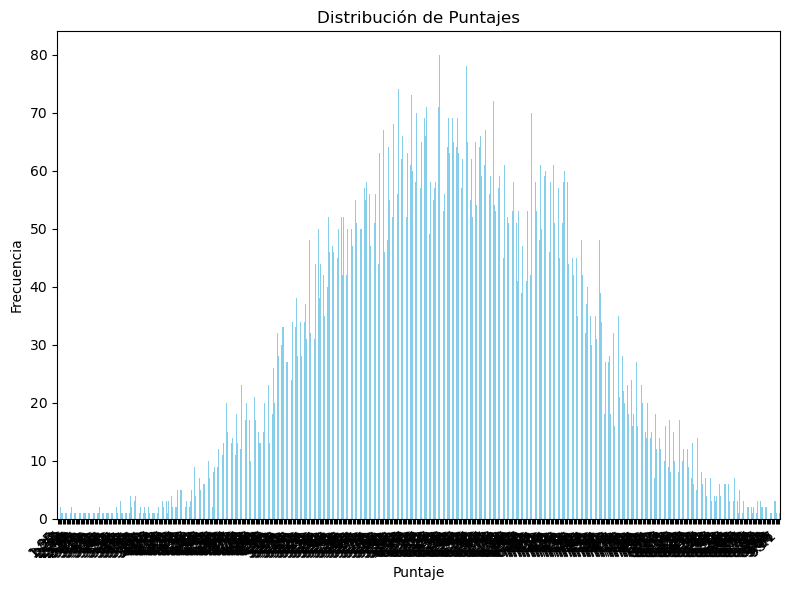

In [113]:
# Construir un gráfico de barras para la variable 'Score'
plt.figure(figsize=(8, 6))
animes_cleaned['Score'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de Puntajes')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

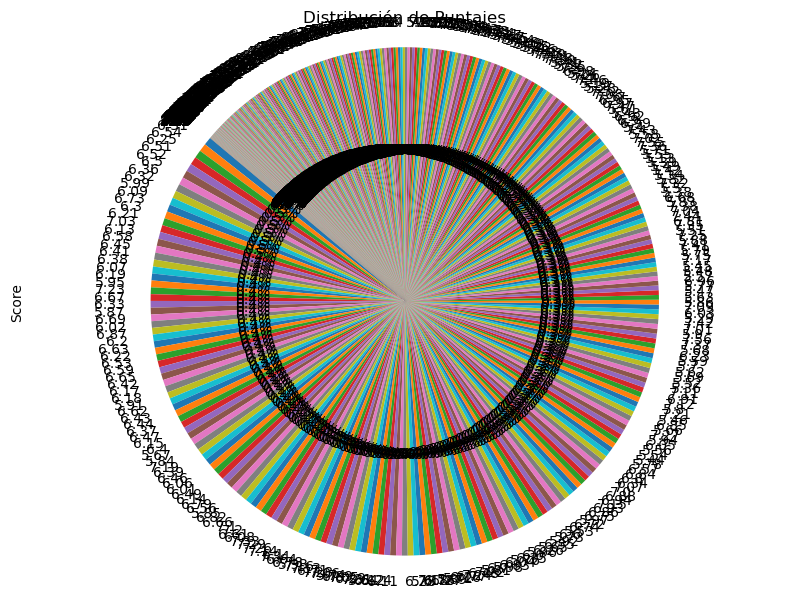

In [114]:
# Construir un gráfico de pie para la distribución de puntajes
plt.figure(figsize=(8, 6))
animes_cleaned['Score'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Puntajes')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [115]:
# Tabla de frecuencias para los puntajes
score_freq_table = animes_cleaned['Score'].value_counts()
print("Tabla de frecuencias para 'Score':")
score_freq_table

Tabla de frecuencias para 'Score':


6.31    80
6.54    80
6.25    79
6.51    79
6.52    78
        ..
3.65     1
9.00     1
3.50     1
3.47     1
2.76     1
Name: Score, Length: 566, dtype: int64

### Usuarios

In [116]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731576 entries, 0 to 731575
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Mal ID            731576 non-null  int64  
 1   Username          731290 non-null  object 
 2   Gender            224383 non-null  object 
 3   Birthday          168068 non-null  object 
 4   Location          152806 non-null  object 
 5   Joined            731290 non-null  object 
 6   Days Watched      731282 non-null  float64
 7   Mean Score        731282 non-null  float64
 8   Watching          731282 non-null  float64
 9   Completed         731282 non-null  float64
 10  On Hold           731282 non-null  float64
 11  Dropped           731282 non-null  float64
 12  Plan to Watch     731282 non-null  float64
 13  Total Entries     731282 non-null  float64
 14  Rewatched         731282 non-null  float64
 15  Episodes Watched  731282 non-null  float64
dtypes: float64(10), int6

In [117]:
usuarios.isnull().sum()

Mal ID                   0
Username               286
Gender              507193
Birthday            563508
Location            578770
Joined                 286
Days Watched           294
Mean Score             294
Watching               294
Completed              294
On Hold                294
Dropped                294
Plan to Watch          294
Total Entries          294
Rewatched              294
Episodes Watched       294
dtype: int64

#### Construcción de gráfico de barras 

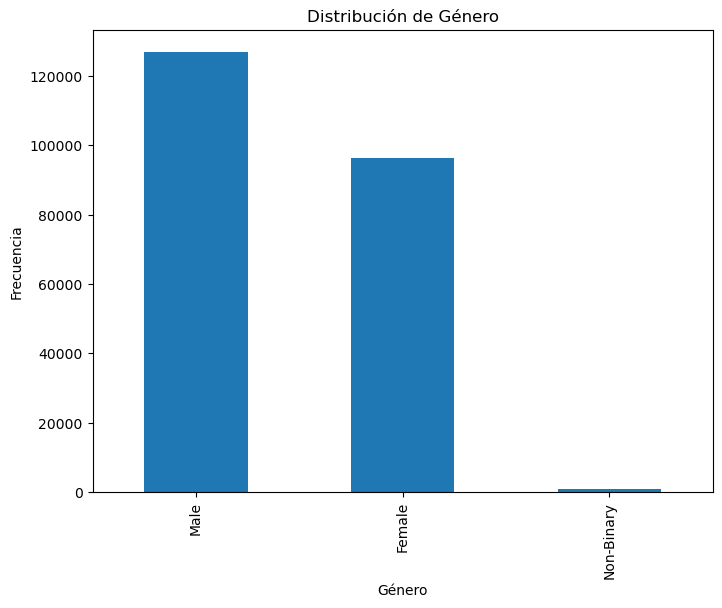

In [118]:
# Construcción de gráfico de barras para el género
plt.figure(figsize=(8, 6))
usuarios['Gender'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

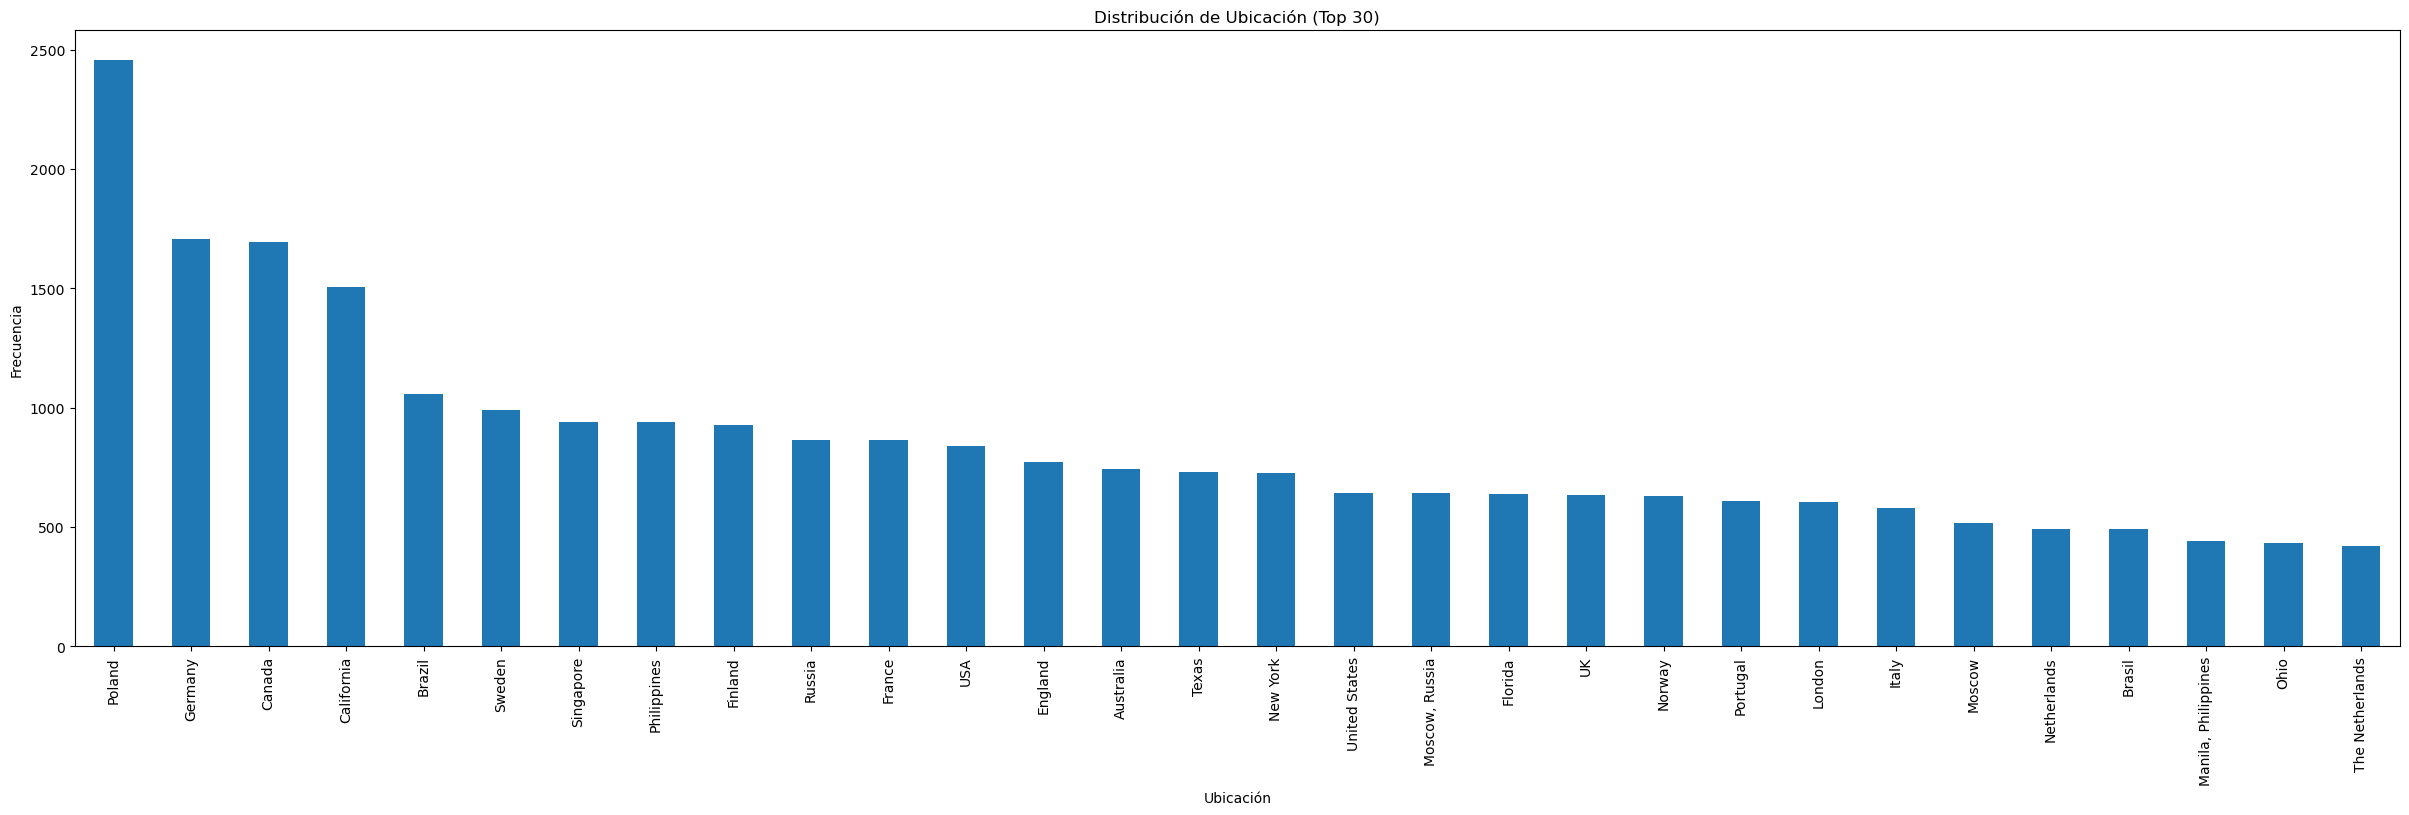

In [119]:
# Gráfico de barras para Location (usando solo datos no nulos)
plt.figure(figsize=(30, 8))
usuarios['Location'].value_counts().head(30).plot(kind='bar')
plt.title('Distribución de Ubicación (Top 30)')
plt.xlabel('Ubicación')
plt.ylabel('Frecuencia')
plt.show()

In [120]:
# Convertir las columnas 'Birthday' y 'Joined' al formato datetime
usuarios['Birthday'] = pd.to_datetime(usuarios['Birthday'], errors='coerce')
usuarios['Joined'] = pd.to_datetime(usuarios['Joined'], errors='coerce')

In [121]:
# Extraer el año y el mes de la columna 'Birthday' y 'Joined'
usuarios['Birthday_Year'] = usuarios['Birthday'].dt.year
usuarios['Birthday_Month'] = usuarios['Birthday'].dt.month
usuarios['Joined_Year'] = usuarios['Joined'].dt.year
usuarios['Joined_Month'] = usuarios['Joined'].dt.month

<Figure size 1200x600 with 0 Axes>

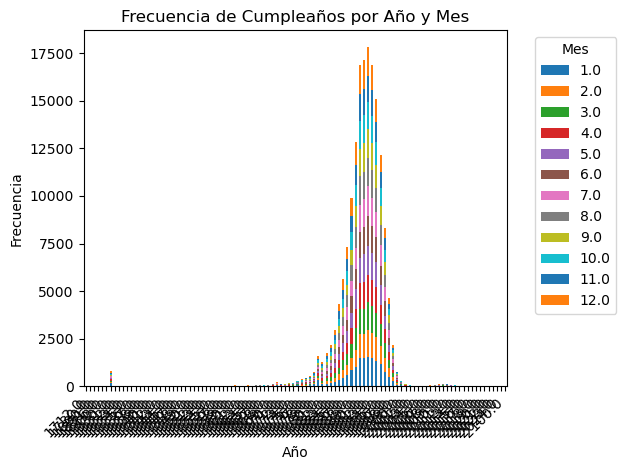

In [122]:
# Crear un gráfico de barras para Birthday
plt.figure(figsize=(12, 6))
usuarios.groupby(['Birthday_Year', 'Birthday_Month']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Frecuencia de Cumpleaños por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

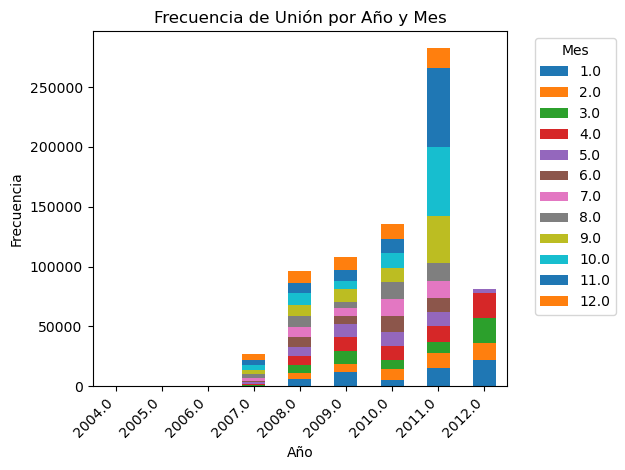

In [123]:

# Crear un gráfico de barras para Joined
plt.figure(figsize=(12, 6))
usuarios.groupby(['Joined_Year', 'Joined_Month']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Frecuencia de Unión por Año y Mes')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

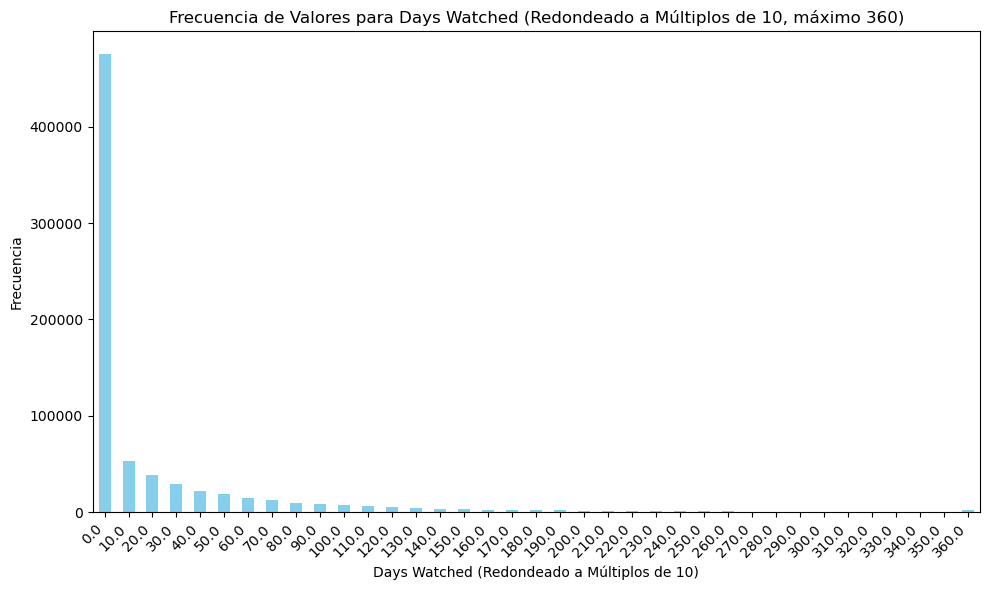

In [140]:

# Limitar los valores de "Days Watched" a un máximo de 360
limited_days_watched = usuarios['Days Watched'].clip(0, 360)

# Redondear los días observados a múltiplos de 10
rounded_days_watched = (limited_days_watched // 10) * 10

# Crear un gráfico de barras para los días observados redondeados a múltiplos de 10
plt.figure(figsize=(10, 6))
rounded_days_watched.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Valores para Days Watched (Redondeado a Múltiplos de 10, máximo 360)')
plt.xlabel('Days Watched (Redondeado a Múltiplos de 10)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Rating

In [125]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24436724 entries, 0 to 24436723
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 559.3 MB


In [126]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [127]:
rating.describe()

,user_id,anime_id,rating
count,2.443672e+07,2.443672e+07,2.443672e+07
mean,4.385614e+05,9.748595e+03,7.615574e+00
std,3.670992e+05,1.204943e+04,1.677738e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,9.559600e+04,8.740000e+02,7.000000e+00
50%,3.867130e+05,4.726000e+03,8.000000e+00
75%,5.269330e+05,1.314500e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


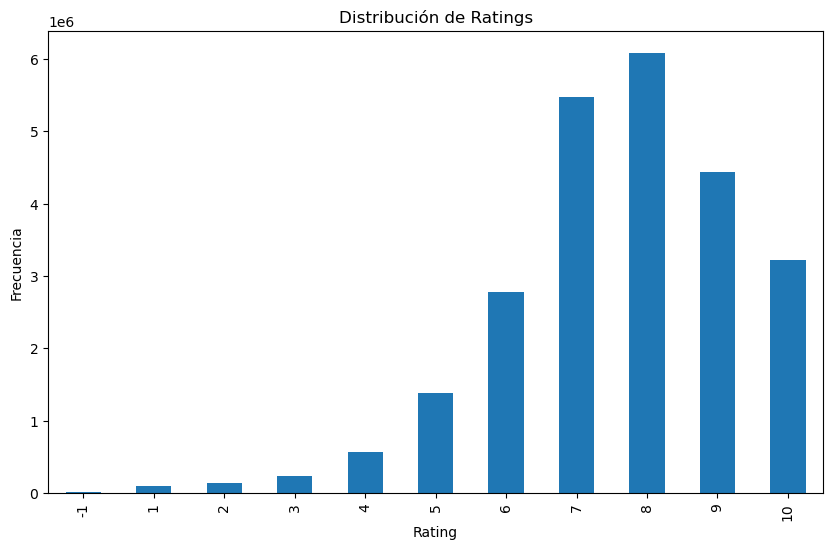

In [128]:
# Gráfico de barras para el recuento de ratings
plt.figure(figsize=(10, 6))
rating['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

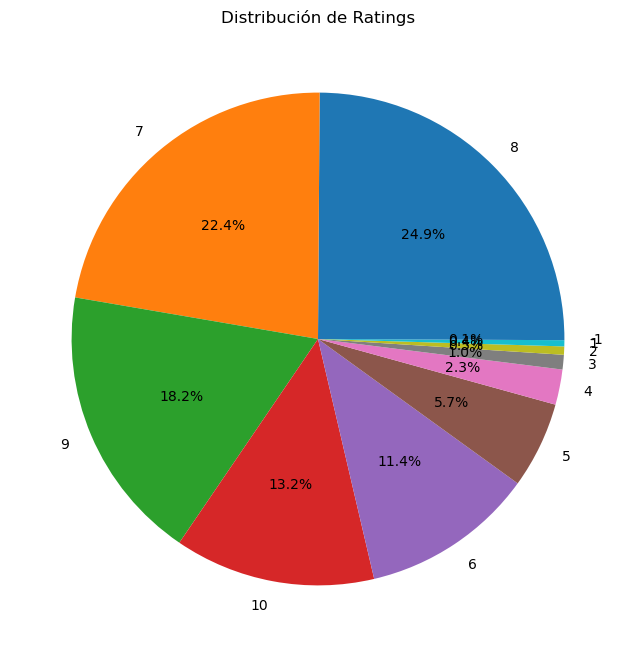

In [129]:
# Gráfico de pie para la distribución de ratings
plt.figure(figsize=(8, 8))
rating['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Ratings')
plt.ylabel('')
plt.show()

In [130]:
# Tabla de frecuencias de ratings
rating_freq_table = rating['rating'].value_counts().reset_index()
rating_freq_table.columns = ['Rating', 'Frecuencia']
print("Tabla de Frecuencias de Ratings:")
print(rating_freq_table)

Tabla de Frecuencias de Ratings:
    Rating  Frecuencia
0        8     6083376
1        7     5475444
2        9     4444310
3       10     3219089
4        6     2779855
5        5     1385548
6        4      564915
7        3      234453
8        2      132598
9        1       98469
10      -1       18667


## Análisis Univariado Continuo:

### Usuarios

In [131]:
usuarios.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched,Birthday_Year,Birthday_Month,Joined_Year,Joined_Month
count,7.315760e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05,168058.000000,168058.000000,731290.000000,731290.000000
mean,5.068376e+05,24.180819,3.948018,4.765714,65.953066,3.391615,4.565480,17.547893,96.230147,4.443352,1.658828e+03,1990.308054,6.470641,2010.082059,6.975860
std,3.640611e+05,140.105073,4.137606,20.495890,186.633286,19.296913,34.915341,90.286927,265.459220,29.693175,5.077168e+04,6.843678,3.457165,1.357452,3.556487
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1712.000000,1.000000,2004.000000,1.000000
25%,2.006675e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1988.000000,3.000000,2009.000000,4.000000
50%,4.250265e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01,1991.000000,6.000000,2010.000000,8.000000
75%,7.750605e+05,24.800000,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03,1994.000000,9.000000,2011.000000,10.000000
max,1.291097e+06,105338.600000,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07,2100.000000,12.000000,2012.000000,12.000000


### Rating

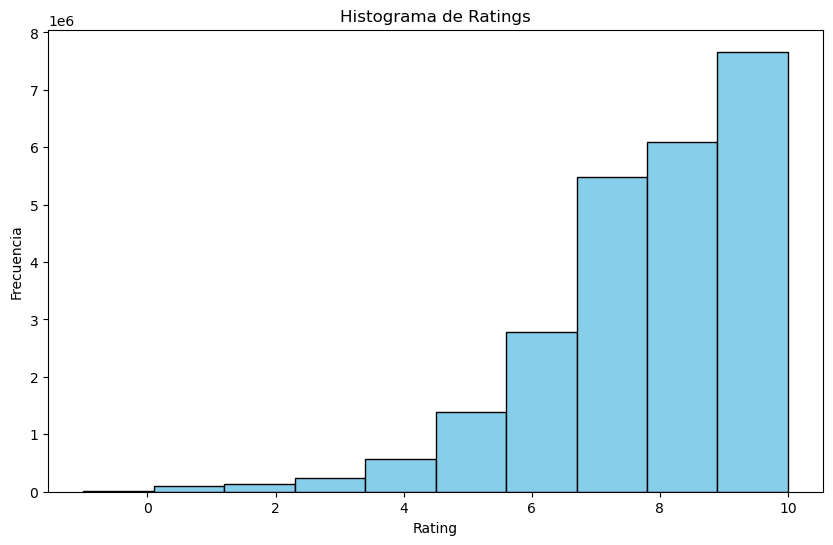

In [132]:
# Histograma de ratings
plt.figure(figsize=(10, 6))
plt.hist(rating['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

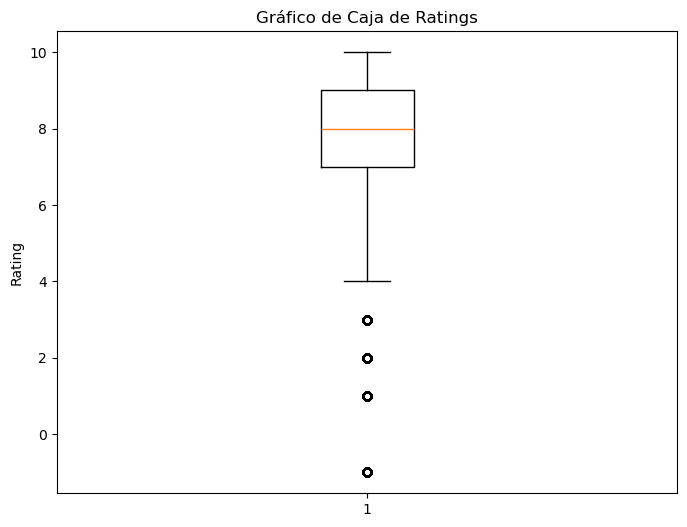

In [133]:
# Gráfico de caja para los ratings
plt.figure(figsize=(8, 6))
plt.boxplot(rating['rating'])
plt.title('Gráfico de Caja de Ratings')
plt.ylabel('Rating')
plt.show()

In [134]:
# Estadísticas descriptivas de los ratings
rating.describe()

,user_id,anime_id,rating
count,2.443672e+07,2.443672e+07,2.443672e+07
mean,4.385614e+05,9.748595e+03,7.615574e+00
std,3.670992e+05,1.204943e+04,1.677738e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,9.559600e+04,8.740000e+02,7.000000e+00
50%,3.867130e+05,4.726000e+03,8.000000e+00
75%,5.269330e+05,1.314500e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


## Análisis Multivariado:

### Rating

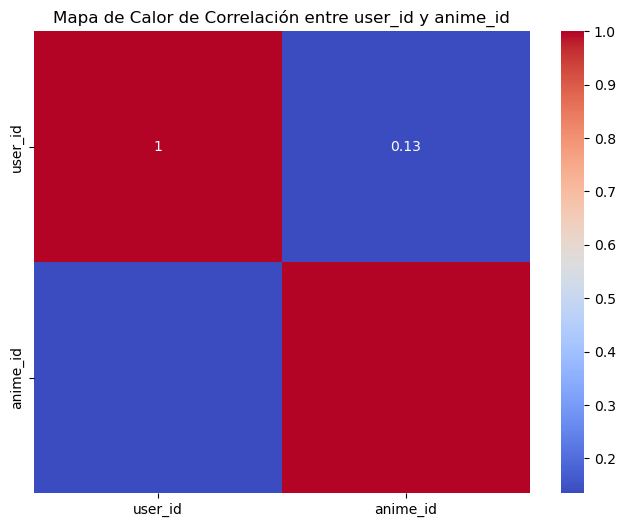

In [135]:
# Matriz de correlación entre user_id y anime_id
correlation_matrix = rating[['user_id', 'anime_id']].corr()

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación entre user_id y anime_id')
plt.show()

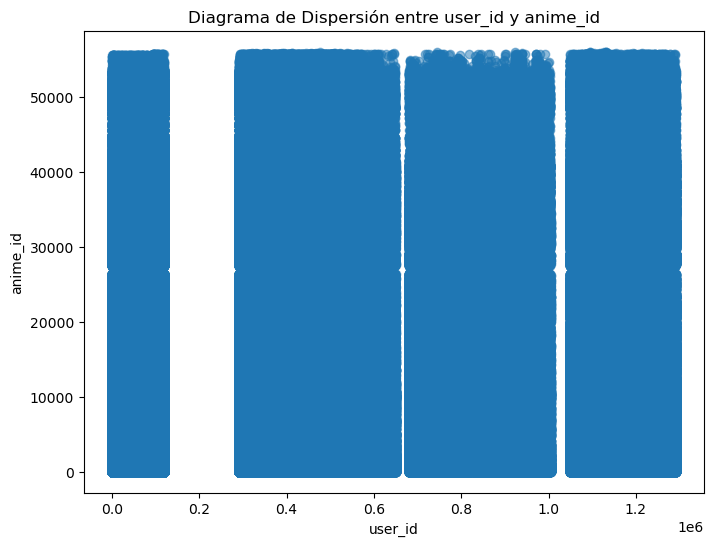

In [136]:
# Diagrama de dispersión entre user_id y anime_id
plt.figure(figsize=(8, 6))
plt.scatter(rating['user_id'], rating['anime_id'], alpha=0.5)
plt.title('Diagrama de Dispersión entre user_id y anime_id')
plt.xlabel('user_id')
plt.ylabel('anime_id')
plt.show()